- Performed exploratory data analysis on the dataset, determining data types and null values, and generated descriptive statistics to evaluate data quality and structure.
- Designed new features by classifying age groups, computed BMI categories, and integrated multiple columns to produce relevant health indicators for further analysis.
- Processed the dataset by addressing missing values, converted data types, and encoded categorical variables to prepare the data for analysis and visualization.
- Applied group-wise analysis to derive insights from data subsets based on categorical variables such as gender and age group, highlighting key trends in health metrics.
- Illustrated data distributions and trends using bar charts, histograms, and grouped aggregations to identify patterns in physical activity, sleep, and health-related behaviors.

In [1]:
#%pip install pandas
import pandas as pd

#%pip install numpy
import numpy as np

#%pip install matplotlib
import matplotlib
import matplotlib.pyplot as plt

#%pip install seaborn
import seaborn as sns

import re
import requests

#%pip install statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

np.random.seed(99)
plt.rcParams['figure.figsize'] = (8, 5) # Note that we configure a custom default figure size.
#Virtually every default aspect of matplotlib can be customized (https://matplotlib.org/users/customizing.html).

In [2]:
URL = "https://raw.githubusercontent.com/Xuyang-Ma-WLU/LAB-DATASETS/refs/heads/main/DATA200/Beers.csv"
beers = pd.read_csv(URL)
beers.head()

,Content,Type,ID,Flavour,BrewID,12,16,24,32,Other
0,22.000,IBU,1887,Abbey Single Ale,57,Abbey's Single Ale (Current),NaN,NaN,NaN,NaN
1,22.000,IBU,2505,Abbey Single Ale,57,Abbey's Single (2015- ),NaN,NaN,NaN,NaN
2,0.049,AP,1887,Abbey Single Ale,57,Abbey's Single Ale (Current),NaN,NaN,NaN,NaN
3,0.049,AP,2505,Abbey Single Ale,57,Abbey's Single (2015- ),NaN,NaN,NaN,NaN
4,40.000,IBU,502,Altbier,395,Alteration,NaN,NaN,NaN,NaN


In [3]:
beers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4820 entries, 0 to 4819
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Content  3753 non-null   float64
 1   Type     4820 non-null   object 
 2   ID       4820 non-null   int64  
 3   Flavour  4810 non-null   object 
 4   BrewID   4820 non-null   int64  
 5   12       3052 non-null   object 
 6   16       1682 non-null   object 
 7   24       44 non-null     object 
 8   32       10 non-null     object 
 9   Other    34 non-null     object 
dtypes: float64(1), int64(2), object(7)
memory usage: 376.7+ KB


In [4]:
URL = "https://raw.githubusercontent.com/Xuyang-Ma-WLU/LAB-DATASETS/refs/heads/main/DATA200/Breweries.csv"
breweries = pd.read_csv(URL)
breweries.head()

,Brewery,City,State
0,0/NorthGate Brewing,Minneapolis,MN
1,1/Against the Grain Brewery,Louisville,KY
2,2/Jack's Abby Craft Lagers,Framingham,MA
3,3/Mike Hess Brewing Company,San Diego,CA
4,4/Fort Point Beer Company,San Francisco,CA


In [5]:
breweries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558 entries, 0 to 557
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Brewery  558 non-null    object
 1   City     558 non-null    object
 2   State    558 non-null    object
dtypes: object(3)
memory usage: 13.2+ KB


In [6]:

number_of_observations = beers.shape[0]
print(number_of_observations)

top_flavors = beers["Flavour"].value_counts().head(5).index
print(top_flavors)

top_states = breweries.groupby(by="State").Brewery.count().sort_values(ascending=False).head(5)
print(top_states)

4820
Index(['American IPA', 'American Pale Ale (APA)', 'American Amber / Red Ale',
       'American Blonde Ale', 'American Double / Imperial IPA'],
      dtype='object', name='Flavour')
State
CO    47
CA    39
MI    32
OR    29
TX    28
Name: Brewery, dtype: int64


### Caleaning and exploring data

In [7]:
display(beers.isnull().sum())
beers2 = beers.dropna(axis=1)
beers2

,0
Content,1067
Type,0
ID,0
Flavour,10
BrewID,0
12,1768
16,3138
24,4776
32,4810
Other,4786


,Type,ID,BrewID
0,IBU,1887,57
1,IBU,2505,57
2,AP,1887,57
3,AP,2505,57
4,IBU,502,395
...,...,...,...
4815,AP,1635,160
4816,AP,1790,166
4817,AP,2210,29
4818,AP,2527,66


In [8]:
breweries = ( pd.concat([breweries, breweries['Brewery'].str.split('/', expand=True)], axis=1)
 .rename(columns={0: "BrewID", 1: "BrewName"})
 .drop('Brewery', axis=1)
 .astype({'BrewID': 'int32'})
)

breweries

,City,State,BrewID,BrewName
0,Minneapolis,MN,0,NorthGate Brewing
1,Louisville,KY,1,Against the Grain Brewery
2,Framingham,MA,2,Jack's Abby Craft Lagers
3,San Diego,CA,3,Mike Hess Brewing Company
4,San Francisco,CA,4,Fort Point Beer Company
...,...,...,...,...
553,Covington,LA,553,Covington Brewhouse
554,Wilson,WI,554,Dave's Brewfarm
555,Ukiah,CA,555,Ukiah Brewing Company
556,Garrattsville,NY,556,Butternuts Beer and Ale


In [9]:
beers

,Content,Type,ID,Flavour,BrewID,12,16,24,32,Other
0,22.000,IBU,1887,Abbey Single Ale,57,Abbey's Single Ale (Current),NaN,NaN,NaN,NaN
1,22.000,IBU,2505,Abbey Single Ale,57,Abbey's Single (2015- ),NaN,NaN,NaN,NaN
2,0.049,AP,1887,Abbey Single Ale,57,Abbey's Single Ale (Current),NaN,NaN,NaN,NaN
3,0.049,AP,2505,Abbey Single Ale,57,Abbey's Single (2015- ),NaN,NaN,NaN,NaN
4,40.000,IBU,502,Altbier,395,Alteration,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
4815,0.060,AP,1635,NaN,160,Kilt Lifter Scottish-Style Ale,NaN,NaN,NaN,NaN
4816,NaN,AP,1790,NaN,166,CAN'D AID Foundation,NaN,NaN,NaN,NaN
4817,NaN,AP,2210,NaN,29,NaN,Special Release,NaN,NaN,NaN
4818,0.053,AP,2527,NaN,66,OktoberFiesta,NaN,NaN,NaN,NaN


In [10]:

beers = (beers.melt(id_vars = ["Content", "Type", "ID", "Flavour", "BrewID"], value_vars = ["12", "16", "24", "32", "Other"],    # SOLUTION
                    var_name = "Volume", value_name = "Name")
   .dropna(subset = ["Name"])
   .set_index(["ID", "Flavour", "BrewID", "Volume", "Name"])
   .pivot(columns="Type")["Content"]
   .reset_index())


beers24 = beers[beers["Volume"]=="24"][["BrewID","Name"]]
beers24

Type,BrewID,Name
196,547,Iron Mike Pale Ale
197,547,Boneshaker Brown Ale
251,543,Black Star Double Hopped Golden Lager (24 oz.)
432,449,Blacktop Blonde
433,449,TailGate Hefeweizen
470,449,TailGate IPA
1032,439,Longboard Island Lager
1789,236,Stickin' In My Rye
1822,46,Bengali
1999,134,Boxer


In [11]:

breweries["State"] = breweries["State"].str.strip()
breweriesCA = breweries[breweries["State"]=="CA"]
breweriesCA



pd.merge(beers24, breweriesCA, how="left", on="BrewID")

pd.merge(beers24, breweriesCA, how="inner", on="BrewID")

pd.merge(beers24, breweriesCA, how="right", on="BrewID")

pd.merge(beers24, breweriesCA, how="outer", on="BrewID")



,BrewID,Name,City,State,BrewName
0,3,NaN,San Diego,CA,Mike Hess Brewing Company
1,4,NaN,San Francisco,CA,Fort Point Beer Company
2,24,Mr. Tea,NaN,NaN,NaN
3,33,NaN,Torrance,CA,The Dudes' Brewing Company
4,34,NaN,San Diego,CA,Ballast Point Brewing Company
5,35,NaN,San Francisco,CA,Anchor Brewing Company
6,36,NaN,Buellton,CA,Figueroa Mountain Brewing Company
7,46,Bengali,NaN,NaN,NaN
8,48,NaN,Paso Robles,CA,Firestone Walker Brewing Company
9,64,Tripel Deke,NaN,NaN,NaN


### Regular expressions

In [12]:
URL = "https://gitlab.com/sukhjitsehra/datasets/-/raw/master/DATA200/Fraudulent_Emails_F.txt"
response = requests.get(URL)
email_text = response.text #It may take a while to download the file

In [13]:
match = re.search("Portugal", email_text)
if match is not None:
    print("Portugal is found in the data")
else:
    print("Portugal is not found in the data")

Portugal is found in the data


In [14]:
split = re.split('From r', email_text)
split[1]

'  Wed Oct 30 21:41:56 2002\nReturn-Path: <james_ngola2002@maktoob.com>\nX-Sieve: cmu-sieve 2.0\nReturn-Path: <james_ngola2002@maktoob.com>\nMessage-Id: <200210310241.g9V2fNm6028281@cs.CU>\nFrom: "MR. JAMES NGOLA." <james_ngola2002@maktoob.com>\nReply-To: james_ngola2002@maktoob.com\nTo: webmaster@aclweb.org\nDate: Thu, 31 Oct 2002 02:38:20 +0000\nSubject: URGENT BUSINESS ASSISTANCE AND PARTNERSHIP\nX-Mailer: Microsoft Outlook Express 5.00.2919.6900 DM\nMIME-Version: 1.0\nContent-Type: text/plain; charset="us-ascii"\nContent-Transfer-Encoding: 8bit\nX-MIME-Autoconverted: from quoted-printable to 8bit by sideshowmel.si.UM id g9V2foW24311\nStatus: O\n\nFROM:MR. JAMES NGOLA.\nCONFIDENTIAL TEL: 233-27-587908.\nE-MAIL: (james_ngola2002@maktoob.com).\n\nURGENT BUSINESS ASSISTANCE AND PARTNERSHIP.\n\n\nDEAR FRIEND,\n\nI AM ( DR.) JAMES NGOLA, THE PERSONAL ASSISTANCE TO THE LATE CONGOLESE (PRESIDENT LAURENT KABILA) WHO WAS ASSASSINATED BY HIS BODY GUARD ON 16TH JAN. 2001.\n\n\nTHE INCIDENT OCC

In [15]:
for line in re.findall('From:.*', email_text):
    print(line)

From: "MR. JAMES NGOLA." <james_ngola2002@maktoob.com>
From: "Mr. Ben Suleman" <bensul2004nng@spinfinder.com>
From: "PRINCE OBONG ELEME" <obong_715@epatra.com>
From: "PRINCE OBONG ELEME" <obong_715@epatra.com>
From: "Maryam Abacha" <m_abacha03@www.com>
From: Kuta David <davidkuta@postmark.net>
From: "Barrister tunde dosumu" <tunde_dosumu@lycos.com>
From: "William Drallo" <william2244drallo@maktoob.com>
From: "MR USMAN ABDUL" <abdul_817@rediffmail.com>
From: "Tunde  Dosumu" <barrister_td@lycos.com>
From: MR TEMI JOHNSON <temijohnson2@rediffmail.com>
From: "Dr.Sam jordan" <sjordan@diplomats.com>
From: p_brown2@lawyer.com
From: Barrister Peter Brown
From: mic_k1@post.com
From: "COL. MICHAEL BUNDU" <mikebunduu1@rediffmail.com>
From: "MRS MARIAM ABACHA" <elixwilliam@usa.com>
From: " DR. ANAYO AWKA " <anayoawka@hotmail.com>
From: " DR. ANAYO AWKA " <anayoawka@hotmail.com>
From: "Victor Aloma" <victorloma@netscape.net>
From: "Victor Aloma" <victorloma@netscape.net>
From: "JAMES NGOLA" <james_

In [16]:
re.findall("\w\S*@.*\w", email_text)

['james_ngola2002@maktoob.com',
 'james_ngola2002@maktoob.com',
 '200210310241.g9V2fNm6028281@cs.CU',
 'james_ngola2002@maktoob.com',
 'james_ngola2002@maktoob.com',
 'webmaster@aclweb.org',
 'james_ngola2002@maktoob.com',
 'bensul2004nng@spinfinder.com',
 'bensul2004nng@spinfinder.com',
 '200210311310.g9VDANt24674@bloodwork.mr.itd.UM',
 'bensul2004nng@spinfinder.com',
 'R@M',
 'obong_715@epatra.com',
 'obong_715@epatra.com',
 '200210312227.g9VMQvDj017948@bluewhale.cs.CU',
 'obong_715@epatra.com',
 'obong_715@epatra.com',
 'webmaster@aclweb.org',
 'ADDRESS:obong_715@epatra.com',
 'Address:obong_715@epatra.com',
 'obong_715@epatra.com',
 'obong_715@epatra.com',
 '200210312253.g9VMreDj018024@bluewhale.cs.CU',
 'obong_715@epatra.com',
 'webmaster@aclweb.org',
 'ADDRESS:obong_715@epatra.com',
 'Address:obong_715@epatra.com',
 'm_abacha03@www.com',
 'm_abacha03@www.com',
 '200211010948.gA19mLu22932@perfectworld.mr.itd.UM',
 'm_abacha03@www.com',
 'm_abacha03@www.com',
 'R@M',
 'tony_m@lawye

### Strings and regex in pandas

In [18]:
URL = "https://raw.githubusercontent.com/Xuyang-Ma-WLU/LAB-DATASETS/refs/heads/main/DATA200/Fraudulent_Emails_DF.csv"
email_df = pd.read_csv(URL)
email_df.head()

,sender_email,sender_name,recipient_email,recipient_name,date_sent,subject,email_body
0,james_ngola2002@maktoob.com,"""MR. JAMES NGOLA.""",james_ngola2002@maktoob.com,NaN,31 Oct 2002,URGENT BUSINESS ASSISTANCE AND PARTNERSHIP,email body here
1,bensul2004nng@spinfinder.com,"""Mr. Ben Suleman""",R@M,NaN,31 Oct 2002,URGENT ASSISTANCE /RELATIONSHIP (P),email body here
2,obong_715@epatra.com,"""PRINCE OBONG ELEME""",obong_715@epatra.com,NaN,31 Oct 2002,GOOD DAY TO YOU,email body here
3,obong_715@epatra.com,"""PRINCE OBONG ELEME""",webmaster@aclweb.org,NaN,31 Oct 2002,GOOD DAY TO YOU,email body here
4,m_abacha03@www.com,"""Maryam Abacha""",m_abacha03@www.com,NaN,1 Nov 2002,I Need Your Assistance.,email body here


In [19]:
email_df = email_df.dropna()

In [20]:
email_df[email_df["sender_email"].str.contains("brown|bala|ahmedakim")]

,sender_email,sender_name,recipient_email,recipient_name,date_sent,subject,email_body
1152,ahmedakim@inbox.lv,"""ahmedakim""",R@E,"""rrrrr""",23 Sep 04,Urgent Transaction (Reply),email body here
1275,brown_tijani@163.com,Brown,R@M,rrrrr,24 Nov 2004,URGENT ASSISTANCE...,email body here
2704,bala_tomson3@latinmail.com,"""bala tomson""","bala_tomson3@latinmail.com"" <bala_tomson3@lati...","""bala_tomson3@latinmail.com""",18 Jun 2006,TREAT VERY CONFIDENTIAL & URGENT RESPONSE.,email body here


In [21]:
email_df["recipient_name"].replace(r'r{4,5}|Rr{4}', 'UNKNOWN', regex=True, inplace=True)

In [22]:
email_df[email_df["recipient_email"].str.match('^\\d+')]

,sender_email,sender_name,recipient_email,recipient_name,date_sent,subject,email_body
385,2003vincent@freesurf.fr,"""barrister vincent usman""",2003vincent@freesurf.fr,,26 Aug 2003,!!!ASSISTANCE NEEDED!!!,email body here


<Axes: ylabel='Frequency'>

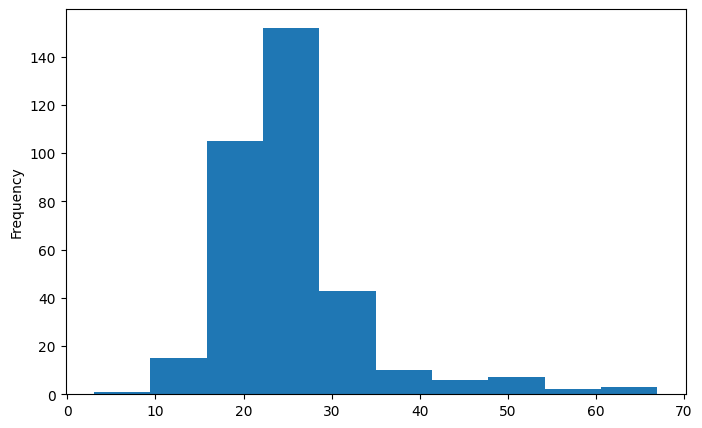

In [23]:
email_df.sender_email.str.len().plot(kind="hist")

In [24]:
email_df["year"] = (email_df.date_sent
                    .str.strip()
                    .str.extract('(\\d{4})')
                    )

Conducted exploratory data analysis on the dataset, including identifying data types, null values, and generating descriptive statistics to assess data quality and structure.

Engineered new features by categorizing age groups, calculating BMI categories, and combining multiple columns to generate relevant health indicators for further analysis.

Cleaned and transformed the dataset by handling missing values, converting data types, and encoding categorical variables to prepare the data for analysis and visualization.

Performed group-wise analysis to extract insights from subsets of data based on categorical variables such as gender and age group, revealing key trends in health metrics.

Visualized data distributions and trends using bar charts, histograms, and grouped aggregations to uncover patterns in physical activity, sleep, and health-related behaviors.